In [5]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize, fsolve

In [6]:
#De data, intensiteit I(a.u.) en afstand x(mm) wordt eerst ingeladen.
#De pandas library bevat eenvoudige commando's om data in te lezen.

import pandas as pd

#De data is een text bestand, waarbij de kolommen gescheiden zijn door zelf ingevoerde tabs.
Data = pd.read_csv('data opdracht 3 circuit 1.txt', sep="\t", header = 0)
display(Data)

Data.columns = ["a", "b", "c"]
f = Data.a
A = Data.b
phi = Data.c*np.pi/180

,Freqentie,Amplitude,Fasehoek
0,1.000000,20.000000,-0.000180
1,1.000220,20.000000,-0.000180
2,1.000441,20.000000,-0.000180
3,1.000661,20.000000,-0.000180
4,1.000881,20.000000,-0.000180
5,1.001102,20.000000,-0.000180
6,1.001322,20.000000,-0.000180
7,1.001543,20.000000,-0.000180
8,1.001764,20.000000,-0.000180
9,1.001984,20.000000,-0.000181


In [7]:
R = 1
C = 0.5*10**(-6)
L = 100*10**(-6)

In [8]:
# Amplitude

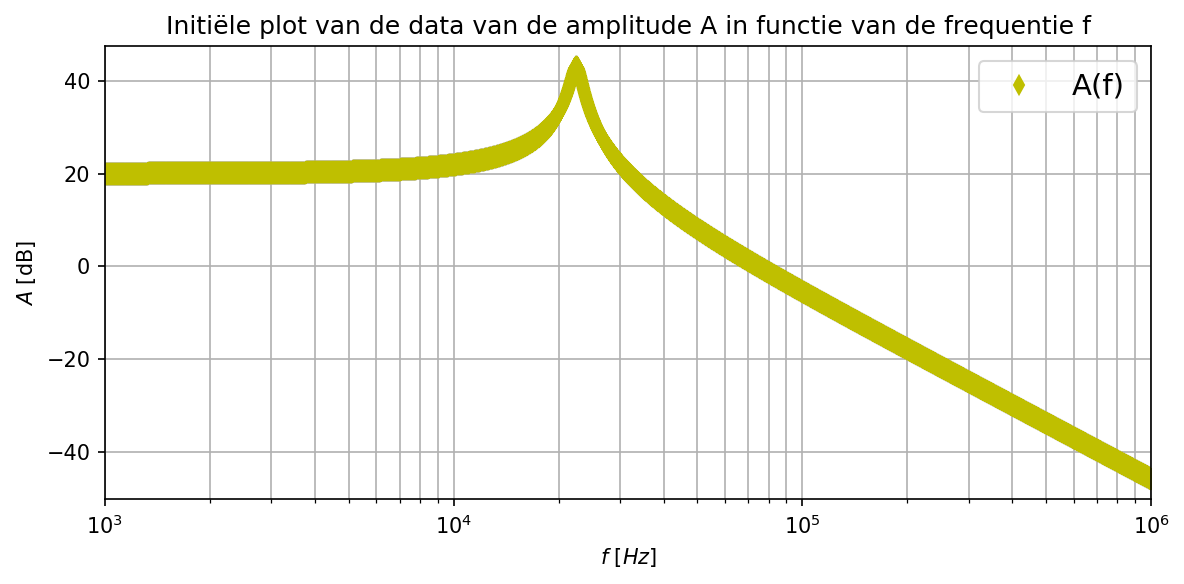

In [11]:
#Vervolgens wordt er een plot gemaakt van de data. Dit geeft meer inzicht dan de tabellen met waarden in.

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(9, 4))


ax.set_title('Initiële plot van de data van de amplitude A in functie van de frequentie f')
ax.grid(True, which = 'both') #Voegt rijen en kolommen toe, zodat de datapunten beter vergeleken en afgelezen kunnen worden.
plt.errorbar(f, A, label = 'A(f)', fmt = 'd ', c='y', capsize=3, elinewidth=0.5, capthick=0.5)
plt.ylabel('$A$ [dB]', size=10)
plt.xlabel('$f$ $[Hz]$', size=10)
plt.legend(fontsize=14)
ax.set_xscale('log')
plt.xlim(10**3,10**6)
plt.tick_params(axis='both', which='major', labelsize=10)


plt.show()

In [24]:
tau = R*C
f_cut = 1/(2*np.pi*np.sqrt(L*C))
omega = 1/np.sqrt(L*C)
xi = R*np.sqrt(C)/(2*np.sqrt(L))

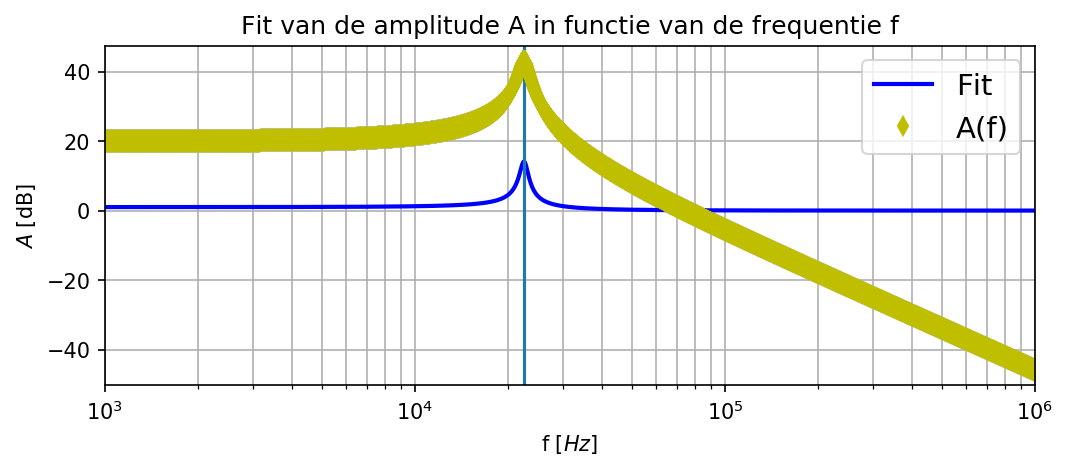

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(8, 3))

#We willen nu een goede benadering vinden van de gevonden data via een Lorentzfunctie die wordt gedefiniëerd als

def amplitude(f, tau):
    """Spanning"""
    return 1/np.sqrt((1-4*np.pi**2*f**2/omega**2)**2 + 4*xi**2 *4*np.pi**2*f**2/omega**2)


#1/np.sqrt((1-4*np.pi**2*f**2/omega**2)**2 + 4*xi**2 + 4*np.pi**2*f**2/omega**2)


#Vervolgens wordt er een initiële fit gemaakt van de data door waarden voor de parameters te gokken, 
#zodat de fit goed past op de data. 
#Na enig puzzelwerk, werden de volgende waarden voor de paramters gekozen die een goede fit lijken te bekomen:

def plot(ax, x, y):
    """Plotten functie Amplitude"""
    ax.plot(x, y, color = 'blue', linewidth=2, label = 'Fit')

tau = R * C

begin = [tau]

z = np.linspace(start=1, stop= 10**6, num=5000)

plt.errorbar(f, A, label = 'A(f)', fmt = 'd ', c='y', capsize=3, elinewidth=0.5, capthick=0.5)

plot(ax, z, amplitude(z,begin[0]))
ax.grid(True, which = 'both')



ax.set_title('Fit van de amplitude A in functie van de frequentie f')
ax.grid(True, which = 'both') #Voegt rijen en kolommen toe, zodat de datapunten beter vergeleken en afgelezen kunnen worden.
plt.ylabel('$A$ [dB]', size=10)
plt.xlabel('f $[Hz]$', size=10)
plt.legend(fontsize=14)
plt.axvline(x= f_cut)
plt.xlim(10**3,10**6)

plt.tick_params(axis='both', which='major', labelsize=10)
ax.set_xscale('log')



plt.show()


In [8]:
tau * 2 * np.pi * f_cut/np.sqrt(1+ 4*np.pi**2*tau**2*f_cut**2)

0.7071067811865475

In [9]:
# Fasehoek

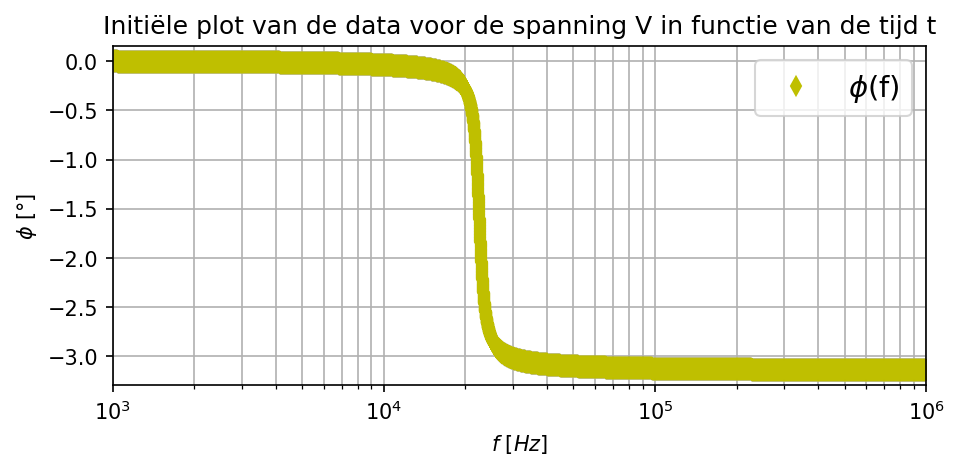

In [27]:
#Vervolgens wordt er een plot gemaakt van de data. Dit geeft meer inzicht dan de tabellen met waarden in.

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(7, 3))


ax.set_title('Initiële plot van de data voor de spanning V in functie van de tijd t')
ax.grid(True, which = 'both') #Voegt rijen en kolommen toe, zodat de datapunten beter vergeleken en afgelezen kunnen worden.
plt.errorbar(f, phi, label = '$\phi$(f)', fmt = 'd ', c='y', capsize=3, elinewidth=0.5, capthick=0.5)
plt.ylabel('$\phi$ [°]', size=10)
plt.xlabel('$f$ $[Hz]$', size=10)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
ax.set_xscale('log')
plt.xlim(10**3,10**6)




plt.show()

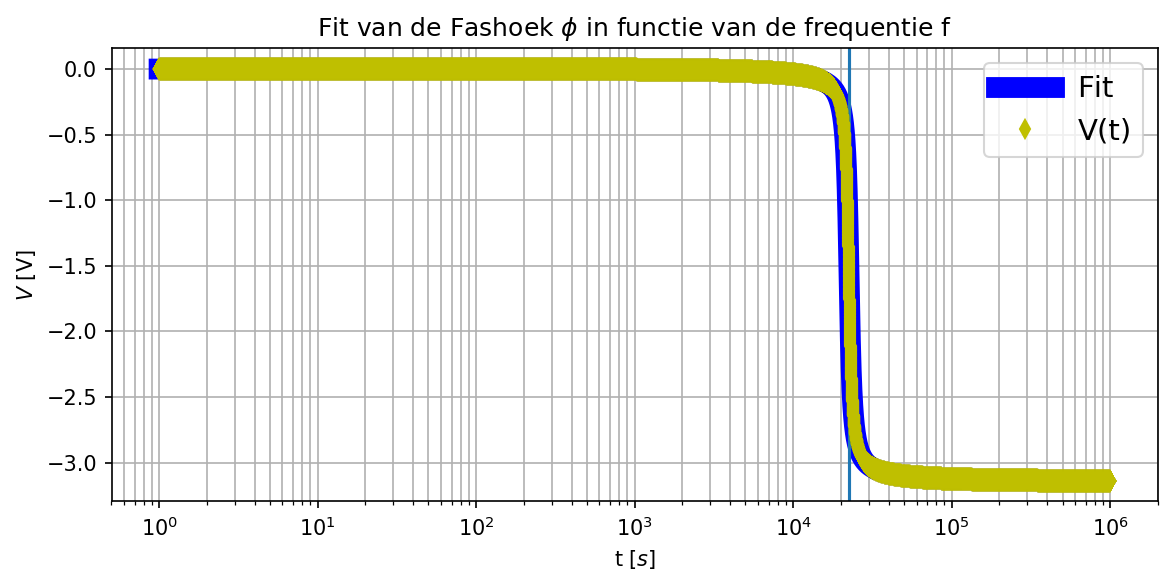

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(9, 4))

#We willen nu een goede benadering vinden van de gevonden data via een Lorentzfunctie die wordt gedefiniëerd als

def fasehoek(f, tau):
    return -np.arctan2(2*xi*2*np.pi*f/omega,1-4*np.pi**2*f**2/omega**2)



#Vervolgens wordt er een initiële fit gemaakt van de data door waarden voor de parameters te gokken, 
#zodat de fit goed past op de data. 
#Na enig puzzelwerk, werden de volgende waarden voor de paramters gekozen die een goede fit lijken te bekomen:

def plot(ax, x, y):
    """Plotten functie Amplitude"""
    ax.plot(x, y, color = 'blue', linewidth=10, label = 'Fit')

tau = R * C

begin = [tau]

z = np.linspace(start=1, stop= 10**5, num=5000)

plt.errorbar(f, phi, label = 'V(t)', fmt = 'd ', c='y', capsize=3, elinewidth=0.5, capthick=0.5)

plot(ax, z, fasehoek(z,begin[0]))
ax.grid(True, which = 'both')



ax.set_title('Fit van de Fashoek $\phi$ in functie van de frequentie f')
ax.grid(True, which = 'both') #Voegt rijen en kolommen toe, zodat de datapunten beter vergeleken en afgelezen kunnen worden.
plt.ylabel('$V$ [V]', size=10)
plt.xlabel('t $[s]$', size=10)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
ax.set_xscale('log')
plt.axvline(x= f_cut)



plt.show()
